In [423]:
#Implementing Neural Network from Scratch.
#Neural Networks are really powerful algorithms used for classification.
#Dataset = Iris_Dataset
#Link = http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

#get dataset
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
target = iris.target


print("Data Shape   = {}".format(data.shape))
print("Target Shape = {}".format(target.shape))
print('Sample data : {}'.format(data[0]))

Data Shape   = (150, 4)
Target Shape = (150,)
Sample data : [ 5.1  3.5  1.4  0.2]


In [424]:
#define layer_neurons
input_units  = 4
hidden_units = 8
output_units = 3

#num of target labels
num_classes=3

#define hyper-parameters
learning_rate = 0.3
#regularization parameter
beta = 0.0001

#num of iterations
iters = 4001

In [425]:
#activation function
def sigmoid(X):
    return 1/(1+np.exp((-1)*X))

In [426]:
#Implementation of 3 layer Neural Network

import numpy as np

#To store Error after every iteration.
J = []

#training function
def train(train_dataset,train_labels):
    #initial values should have zero mean and 0.1 standard deviation
    mean = 0
    std = 0.1

    #WEIGHTS
    global layer1_weights
    global layer1_biases
    global layer2_weights
    global layer2_biases
    
    layer1_weights = np.random.normal(mean,std,(input_units,hidden_units))
    layer1_biases = np.ones(hidden_units)
    layer2_weights = np.random.normal(mean,std,(hidden_units,output_units))
    layer2_biases = np.ones(output_units)

    for j in range(iters):
        #to calculate partial derivates.
        partial_derivates1 = np.zeros([input_units,hidden_units])
        partial_derivates2 = np.zeros([hidden_units,output_units])
        
        #loop the whole training set.
        for i in range(len(train_dataset)):
            #forward propagation
            logits = np.matmul(train_dataset[i,:],layer1_weights) + layer1_biases
            activation1 = np.array(sigmoid(logits)).reshape(1,hidden_units)
            activation2 = np.array(np.matmul(activation1,layer2_weights) + layer2_biases).reshape(1,output_units)

            #backward propagation
            true_labels = np.array(train_labels[i,:]).reshape(-1,num_classes)
            error_output = np.array(np.transpose(activation2)-np.transpose(true_labels)).reshape(train_labels.shape[1],1)
            error_hidden = np.multiply(np.matmul(layer2_weights,error_output),np.transpose(activation1))
            error_hidden = np.multiply(error_hidden,(1-np.transpose(activation1)))

            #partial derivatives
            partial_derivates2 = partial_derivates2 + np.matmul(np.transpose(activation1),np.transpose(error_output))
            t_d = np.array(train_dataset[i,:]).reshape(input_units,1)
            partial_derivates1 = partial_derivates1 + np.matmul(t_d,np.transpose(error_hidden))
        
        partial_derivates2 = (partial_derivates2 + 2*beta*layer2_weights)/len(train_dataset)
        partial_derivates1 = (partial_derivates1 + 2*beta*layer1_weights)/len(train_dataset)

        #update weights
        layer1_weights = layer1_weights - learning_rate*(partial_derivates1)
        layer2_weights = layer2_weights - learning_rate*(partial_derivates2)

        #loss
        _,_,loss = cal_predictions_loss_accuracy(train_dataset,train_labels)
        J.append(loss)
        
        #print accuracy and loss
        if(j%500==0):
            predictions,accuracy,loss = cal_predictions_loss_accuracy(train_dataset,train_labels)
            print("Step %d"%j)
            print("Loss %f"%loss)
            print("Accuracy %f%%"%(accuracy*100))
        
     
#calculate accuracy predictions and loss.    
def cal_predictions_loss_accuracy(train_dataset,train_labels):
    logits = sigmoid(np.matmul(train_dataset,layer1_weights) + layer1_biases)
    logits = sigmoid(np.matmul(logits,layer2_weights) + layer2_biases)
    
    #predictions
    predictions = np.argmax(logits,axis=1) 
    accuracy = np.sum(np.argmax(logits,axis=1) == np.argmax(train_labels,axis=1))/len(train_labels)
    
    loss = 0
    for i in range(train_labels.shape[0]):
        for j in range(train_labels.shape[1]):
            loss = loss +  (-1)*(train_labels[i,j]*(np.log(logits[i,j])) + (1-train_labels[i,j])*(np.log(1-logits[i,j])))
    loss = loss/len(train_labels)
    
    return predictions,accuracy,loss

In [427]:
train_dataset = np.array(data).reshape(-1,4)
train_labels = np.zeros([data.shape[0],num_classes])

#one-hot encoding
for i,label in enumerate(target):
    train_labels[i,label] = 1

#normalizations
for i in range(train_dataset.shape[1]):
    mean = train_dataset[:,i].mean()
    std = train_dataset[:,i].std()
    train_dataset[:,i] = (train_dataset[:,i]-mean)/std

In [428]:
#train data
train(train_dataset,train_labels)

Step 0
Loss 2.169661
Accuracy 33.333333%
Step 500
Loss 1.816690
Accuracy 96.000000%
Step 1000
Loss 1.766285
Accuracy 96.000000%
Step 1500
Loss 1.755319
Accuracy 96.000000%
Step 2000
Loss 1.751633
Accuracy 96.666667%
Step 2500
Loss 1.749714
Accuracy 97.333333%
Step 3000
Loss 1.748329
Accuracy 97.333333%
Step 3500
Loss 1.747160
Accuracy 97.333333%
Step 4000
Loss 1.746113
Accuracy 97.333333%


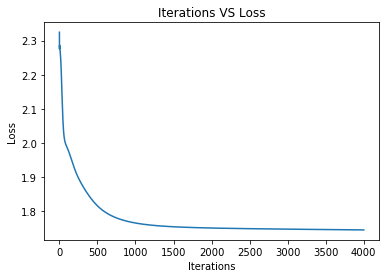

In [429]:
#plot loss graph
import matplotlib.pyplot as plt
plt.plot(list(range(1,iters)),J[1:])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations VS Loss')
plt.show()